In [1]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\macrodata.csv', index_col=['Unnamed: 0'], parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

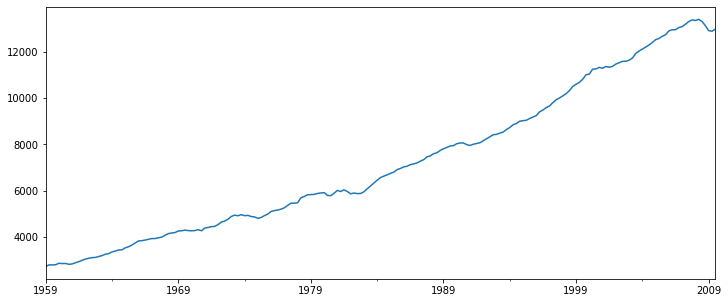

In [20]:
df['realgdp'].plot(figsize=(12,5))

Let's get the trend and cycle out of this using hpfilter

In [22]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

<AxesSubplot:>

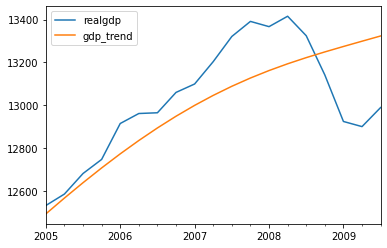

In [23]:
df['gdp_trend'] = gdp_trend
df[['realgdp','gdp_trend']]['2005-01-01':].plot()

## ETS Models (Error-Trend-Seasonality)

ETS Decomposition

In [24]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

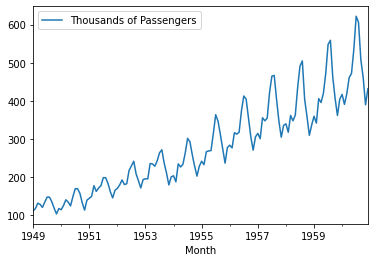

In [26]:
df.plot()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

In [30]:
result.trend
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

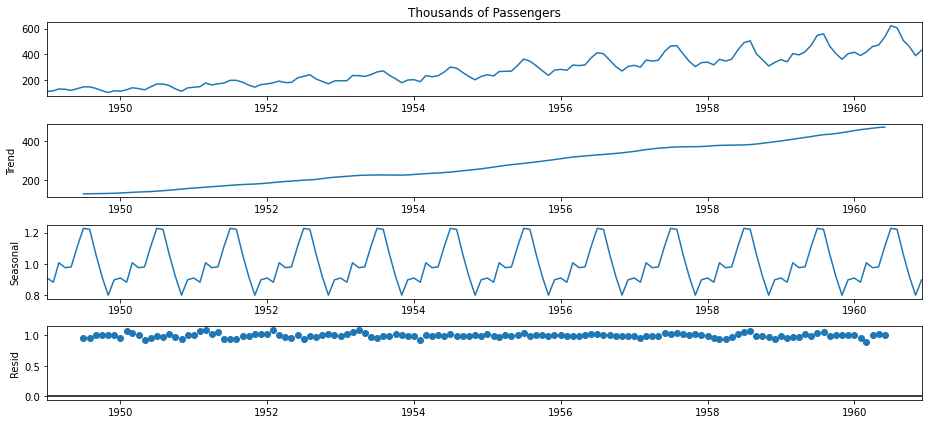

In [36]:
from pylab import rcParams

rcParams['figure.figsize'] = 13,6
result.plot();

## Exponential Weighted Moving Average EWMA

In [37]:
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [38]:
df.dropna(inplace=True)

Let's first see the SMA of the series

In [39]:
df['SMA-6'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['SMA-12'] = df['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

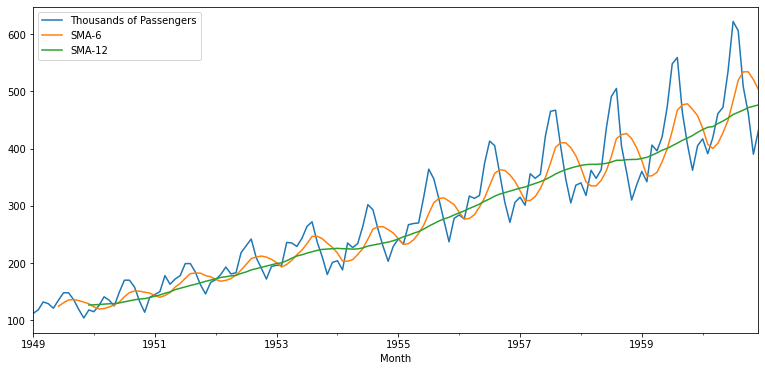

In [40]:
df.plot()

Now Trying EWMA so that the recent points would get more weighted

In [41]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

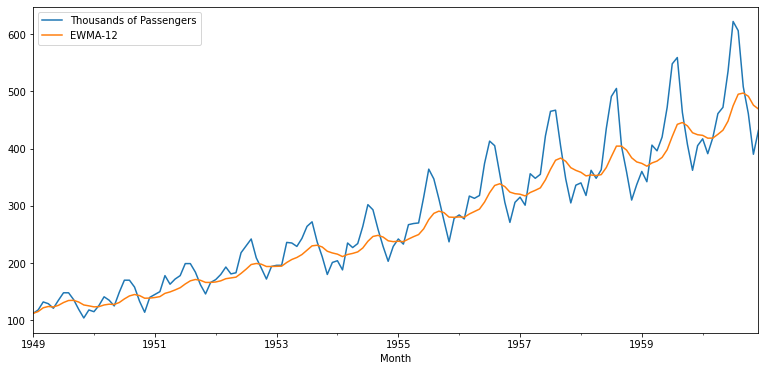

In [42]:
df[['Thousands of Passengers','EWMA-12']].plot()

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ... + (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^t}$

and $\alpha$ which should be $0<\alpha≤1$ is given by :

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

## Holt - Winters Methods

In EWMA, we see that it only uses one parameter for Exponential moving average $\alpha$. This fails to accound for more factors like trend and seasonalities.

In [2]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df = df.dropna()

In [10]:
df.index.freq = 'MS'

Let's start with simple Exponential Smoothing

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [12]:
span = 12
alpha = 2/(span+1)

In [14]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

<AxesSubplot:xlabel='Month'>

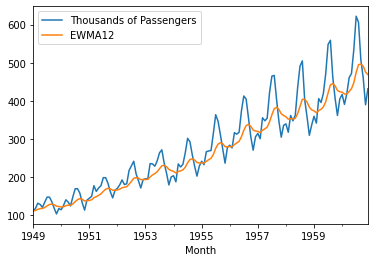

In [15]:
df.plot()

In [18]:
model = SimpleExpSmoothing(df['Thousands of Passengers']);

In [21]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [23]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

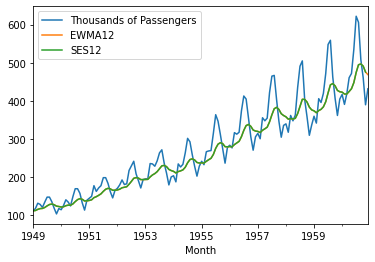

In [24]:
df.plot()

Now, Double Exponential Smoothing

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
df['EXP_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

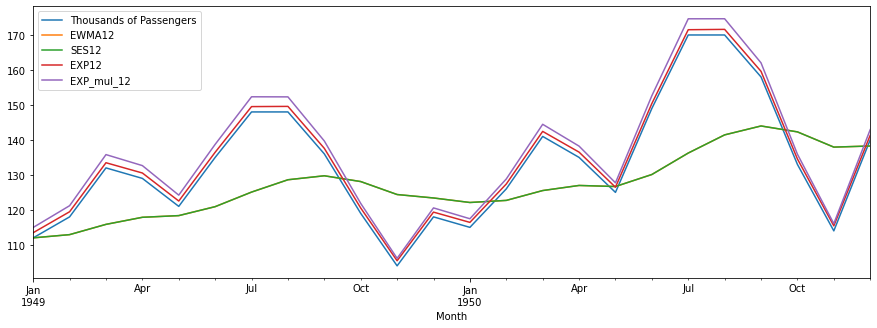

In [35]:
df.iloc[:24].plot(figsize=(15,5))

Tripple Exponential Smoothing

In [37]:
df['TES_MUL_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul',seasonal='mul', seasonal_periods=12).fit().fittedvalues

In [40]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'EXP12', 'EXP_mul_12',
       'TES_MUL_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

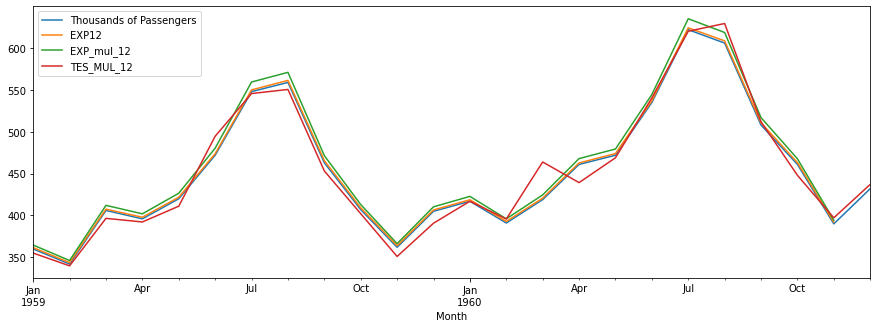

In [42]:
df[['Thousands of Passengers', 'EXP12', 'EXP_mul_12', 'TES_MUL_12']].iloc[-24:].plot(figsize=(15,5))

For forcasting Tripple ES is better is theat the complexity of model includes the Seasonality and Trends both. This is bnetter for the long run.